In [47]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook

import numpy as np
from tqdm import tqdm_notebook as tqdm
import pathlib
from pathlib import Path
Path.ls = lambda x: [p for p in list(x.iterdir()) if '.ipynb_checkpoints' not in p.name]
import pandas as pd
import PIL

import sys
sys.path.append("../")
import slide, filter, util, tiles


base_path = Path('/home/Deep_Learner/shared/Datasets/Hypophysenadenome/')
wsis_path = base_path/'wsis_experimenting'
rois_path = base_path/'rois_experimenting'
tiles_path = base_path/'tiles_experimenting'
wsis_path.mkdir(exist_ok=True)
tiles_path.mkdir(exist_ok=True)

# WSIs

## Process one WSI

In [47]:
p = wsis_path.ls()[0];p
ts = tiles.WsiOrROIToTiles(wsi_path=p, 
                      tiles_folder_path=None, 
                      tile_height=256,tile_width=256, 
                      save_tiles=False, 
                      tile_score_thresh = 0.55, 
                      return_as_tilesummary_object=True)

Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi


## Process multiple WSIs in parallel

In [ ]:
df = tiles.WsiOrROIToTilesMultithreaded(wsis_path.ls()[:2], 
                                   None, 
                                   256, 
                                   256, 
                                   save_tiles=False, 
                                   return_as_tilesummary_object=False)
df.head()

## Extract one tile directly from a WSI at a specific level

In [ ]:
p = wsis_path.ls()[0];p

In [ ]:
s = slide.open_slide(p)

In [ ]:
s.level_dimensions

In [ ]:
tiles.ExtractTileFromWSI(p, x=0,y=0, width=1232,height=840,level=5)

## specify rois by coordinates 

In [3]:
wsi_path = wsis_path.ls()[0];wsi_path

PosixPath('/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi')

In [4]:
wsi = slide.open_slide(wsi_path)

In [5]:
wsi.dimensions

(39424, 26880)

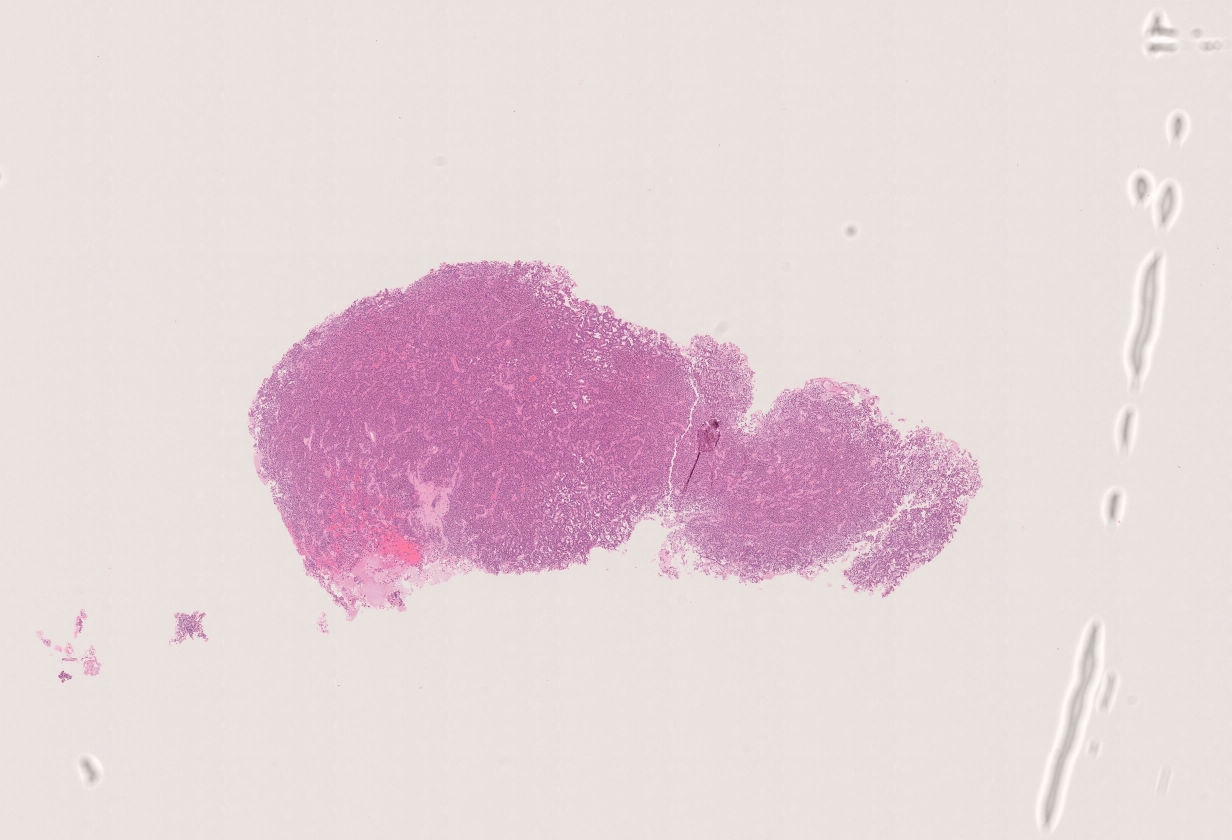

In [6]:
png_img = tiles.wsi_to_scaled_pil_image(wsi_path)[0];png_img

In [102]:
roi1 = tiles.RegionOfInterest(20000,13000,3000,3000,0)
roi2 = tiles.RegionOfInterest(10000,13000,5000,5000, 0)
rois = [roi1, roi2]

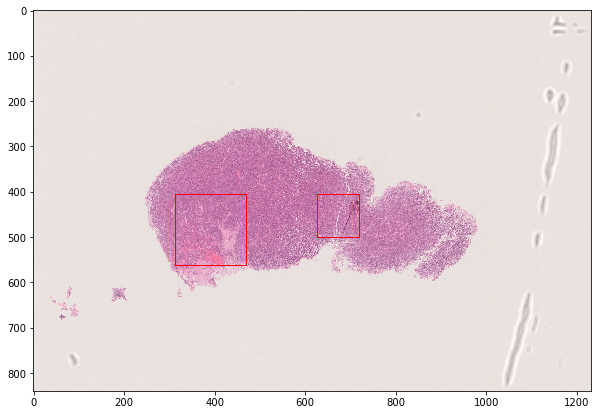

In [78]:
util.show_wsi_with_rois(wsi_path, rois)

In [105]:
wsi_info = tiles.WsiInfo(path=wsi_path, 
                         patient_id=None, 
                         case_id=None, 
                         slide_id=None, 
                         classification_labels=None, 
                         dataset_type=None, 
                         rois=rois)

Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi
x: 20000, y: 13000, height: 3000, width: 3000, level: 0
x: 625, y: 406, height: 94, width: 94, level: 5
8
8
144
x: 10000, y: 13000, height: 5000, width: 5000, level: 0
x: 312, y: 406, height: 156, width: 156, level: 5
8
8
400
505


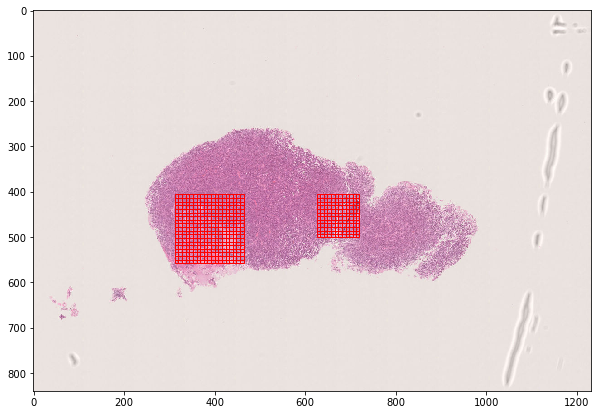

In [107]:
ts = tiles.WsiOrROIToTiles(wsi_path=wsi_path, 
                      tiles_folder_path=None, 
                      tile_height=256,
                      tile_width=256, 
                      save_tiles=False, 
                      tile_score_thresh = 0.0, #take every possible tile inside the rois
                      level = 0,
                      return_as_tilesummary_object=True, 
                      wsi_info=wsi_info)

ts.show_wsi_with_marked_tiles()

# ROIs (rois that have already been extracted from a wsi and saved as .png for example)

## Process one ROI

In [ ]:
p = rois_path.ls()[0];p

tiles.WsiOrROIToTiles(wsi_path=p, 
                      tiles_folder_path=tiles_path, 
                      tile_height=1024,
                      tile_width=1024, 
                      is_wsi=False, 
                      tile_naming_func=tiles.get_roi_name_from_path_pituitary_adenoma_entities, 
                      save_tiles=True, 
                      return_as_tilesummary_object=False)

util.show_multiple_images_big(tiles_path.ls()[:2])

## Extract one tile directly from a ROI

In [ ]:
p = rois_path.ls()[0];p

img = PIL.Image.open(p)

print(img.size)

tiles.ExtractTileFromPILImage(p, 1000, 1000, 512, 512)